In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
import seaborn as sns

In [2]:
GNI88 = pd.read_csv("GNI88_cleaned_data.csv")

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
GNI88.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned
0,2018-02-05,3774467,Opinion: They Voted for Caps. Now They Want Mo...,7096188,Opinion,Neutral,OLD Spending,OLD Nukes Budget Campaign,Neutral,NaN,...,None (Legacy Other),Roll Call,Print,"Bell, Steve",NaN,NaN,Commentary,Capitol Hill Media,Opinion: They Voted for Caps. Now They Want Mo...,Steve Bell
1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta
4,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel


In [4]:
# Check data types
GNI88.dtypes

artdate                     object
Article ID                   int64
Headline                    object
Quote ID                     int64
Article Status              object
Article Position            object
Messages                    object
Submessages                 object
Quote Position              object
Legacy Quote Tag            object
On/Off Message              object
QText                       object
Source Name                 object
Source Type                 object
Source Party Affiliation    object
Source Ethnicity            object
Source Nationality          object
Source Gender               object
Source Religion             object
Legacy Source Tag           object
Constituent Group           object
Media Name                  object
Media Medium                object
Journalist Name             object
Constituent Author          object
Article Issues              object
Custom Group                object
Media Group                 object
fulltext            

In [5]:
# Check null values
GNI88['artdate'].isnull().sum()

0

In [6]:
GNI88['Article ID'].isnull().sum()

0

In [7]:
GNI88['Headline'].isnull().sum()

1662

In [8]:
GNI88['Quote ID'].isnull().sum()

0

In [9]:
GNI88['Article Status'].isnull().sum()

0

In [10]:
GNI88['Article Position'].isnull().sum()

11399

In [11]:
GNI88['Messages'].isnull().sum()

3704

In [12]:
GNI88['Submessages'].isnull().sum()

3704

In [13]:
GNI88['Quote Position'].isnull().sum()

3731

In [15]:
# artdate data range

unique_article = GNI88.drop_duplicates(subset='Article ID', keep="first")

date_list = unique_article['artdate'].tolist()

datetime_list = [datetime.strptime(date,"%Y-%m-%d") for date in date_list]

print(max(datetime_list)) # oldest
print(min(datetime_list)) # earliest

2022-09-12 00:00:00
2011-01-03 00:00:00


/var/folders/tc/bh92rdln5b97ks_khyc1_kbh0000gn/T/ipykernel_42304/942963319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_article['year'] = year_col


<AxesSubplot:xlabel='year', ylabel='Count'>

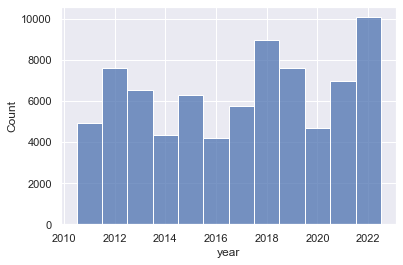

In [16]:
# Numbers of articles collected in GNI88

year_list = [date[:4] for date in date_list]
year_col = [eval(i) for i in year_list]
unique_article['year'] = year_col
sns.set(style="darkgrid")
sns.set(font_scale=1)
sns.histplot(data=unique_article, x='year', discrete=True) 

In [17]:
# article id

unique_article.shape

(77943, 31)

In [18]:
# Quote id

GNI88.shape

(408204, 30)

In [19]:
# article status

Counter(unique_article['Article Status'].tolist())

Counter({'Opinion': 11804, 'News': 66139})

<AxesSubplot:xlabel='Article Status', ylabel='count'>

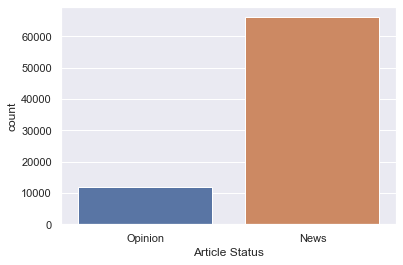

In [20]:
sns.countplot(data = unique_article, x = 'Article Status')

In [21]:
# Article Position

Counter(unique_article['Article Position'].tolist())

Counter({'Neutral': 64003, 'Positive': 5942, 'Negative': 5082, nan: 2916})

<AxesSubplot:xlabel='Article Position', ylabel='count'>

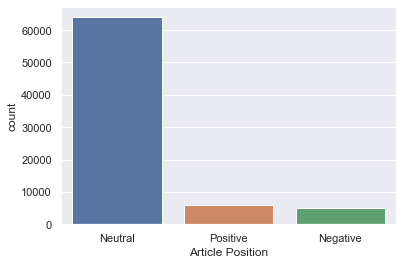

In [22]:
sns.countplot(data = unique_article, x = 'Article Position')

In [23]:
# Messages

Counter(GNI88['Messages'].tolist())

Counter({'OLD Spending': 5626,
         'OLD Proliferation': 95818,
         'OLD Missile Defense': 40638,
         'OLD Arms Reduction': 17639,
         'OLD Other': 779,
         'OLD Foreign Policy Narrative': 18751,
         'OLD Iran': 159752,
         'OLD Sequestration': 94,
         'Arms Reduction': 27263,
         nan: 3704,
         'North Korea': 8082,
         'US Nuclear and Missile Policy': 6715,
         'Iran': 6073,
         'Pakistan': 175,
         'India': 148,
         'China': 2158,
         'Nuclear Consequences': 7181,
         'Russia': 7024,
         'KSA': 57,
         'Israel': 113,
         'Turkey': 12,
         'Ukraine': 402})

In [24]:
# Submessages

Counter(GNI88['Submessages'].tolist())

Counter({'OLD Nukes Budget Campaign': 1660,
         'OLD State Level Nuclear Programs': 90161,
         'OLD Deployment and Testing': 23111,
         'OLD START Treaty': 3805,
         'OLD European/Russian Missile Defense': 8283,
         'OLD Arms Reduction': 3085,
         'OLD US Arsenal': 6538,
         'OLD Modernization': 2308,
         'OLD Loose Nuclear Materials': 3351,
         'OLD Other': 779,
         'OLD Domestic Programs': 9155,
         'OLD  Politics': 6709,
         'OLD NSA Budget': 866,
         'OLD Non-Proliferation': 206,
         'OLD NPT': 1296,
         'OLD Negotiations': 88836,
         'OLD Russia Reset': 10442,
         'OLD Terrorist Threat': 1611,
         'OLD Proliferation': 402,
         'OLD Missile Defense': 89,
         'OLD Foreign Policy Narrative': 1600,
         'OLD Spending': 586,
         'OLD Iranian Domestic Politics': 23491,
         'OLD Tactical Nukes Treaty': 343,
         'OLD Covert Ops': 4377,
         'OLD Sequestration': 94,
  

In [25]:
len(Counter(GNI88['Submessages'].tolist()))

88

In [26]:
# Quote Position

Counter(GNI88['Quote Position'].tolist())

Counter({'Neutral': 242529, 'Positive': 92392, 'Negative': 69552, nan: 3731})

<AxesSubplot:xlabel='Quote Position', ylabel='count'>

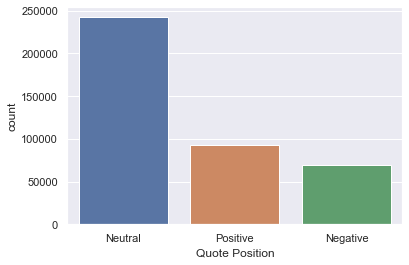

In [27]:
sns.countplot(data = GNI88, x = 'Quote Position')